In [18]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('/Users/fainle/ud/data/pca/train.csv')

In [3]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,6304.000000,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,...,6303.000000,6303.000000,6303.000000,6303.0,6303.0,6303.0,6303.0,6303.0,6303.0,6303.0
mean,4.440355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.139616,0.142313,0.026971,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.885613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.100344,5.531528,1.675680,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,130.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train.fillna(0, inplace=True)

In [6]:
y = train['label']
x = train.drop('label', axis=1)

In [7]:
def show_images(num_images):
    if num_images %10 == 0 and num_images <= 100:
        for digit_num in range(0, num_images):
            plt.subplot(num_images /10, 10, digit_num + 1)
            mat_data = x.iloc[digit_num].as_matrix().reshape(28, 28)
            plt.imshow(mat_data)
            plt.xticks([])
            plt.yticks([])
    else:
        print('That is not the right input, please read the docstring before continuing.')

/data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


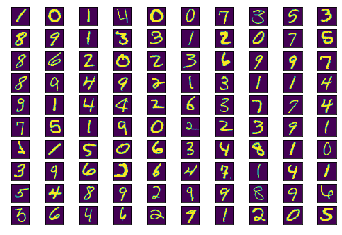

In [8]:
show_images(100)

In [9]:
def show_images_by_digit(digit_to_see):
    if digit_to_see in range(10):
        indices = np.where(y == digit_to_see)
        for digit_num in range(0, 50):
            plt.subplot(5, 10, digit_num + 1)
            mat_data = x.iloc[indices[0][digit_num]].as_matrix().reshape(28, 28)
            plt.imshow(mat_data)
            plt.xticks([])
            plt.yticks([])
    else:
        print('That is not the right input, please read the docstring before continuing.')

/data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


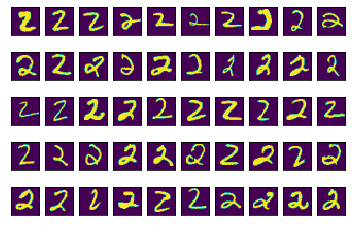

In [10]:
show_images_by_digit(2)

[[127   0   0   0   0   0   3   0   0   0]
 [  0 146   1   0   0   0   0   1   2   0]
 [  1   3 139   0   0   0   0   2   2   1]
 [  2   0   3 108   0   1   0   0   0   0]
 [  1   0   0   0 100   0   1   0   0   2]
 [  1   2   0   3   0 111   1   0   1   0]
 [  1   0   1   0   1   1 122   0   0   0]
 [  0   0   5   1   0   0   0 125   3   1]
 [  0   1   0   5   1   2   0   0 103   1]
 [  2   0   0   2   8   1   0   2   2 105]]
AxesSubplot(0.125,0.125;0.62x0.755)
0.9405233941316415


0.9405233941316415

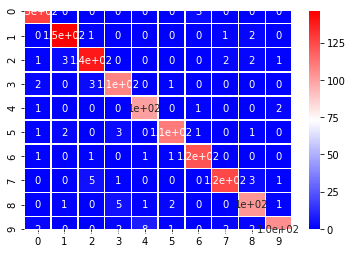

In [11]:
def fit_random_forest_classifier(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    clf = RandomForestClassifier(n_estimators=100, max_depth=None)
    clf.fit(x_train, y_train)
    y_preds = clf.predict(x_test)
    
    mat = confusion_matrix(y_test, y_preds)
    print(mat)
    print(sns.heatmap(mat, annot=True, cmap='bwr', linewidths=0.5))
    acc = accuracy_score(y_test, y_preds)
    print(acc)
    
    return acc

fit_random_forest_classifier(x, y)

In [21]:
def do_pca(n_components, data):
    x = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    x_pca = pca.fit_transform(x)
    return pca, x_pca

In [23]:
pca, x_pca = do_pca(2, x)

In [24]:
x_pca.shape

(6304, 2)

[[ 69   0  20   3   5   9  18   0   5   1]
 [  0 133   0   1   2   5   0   3   2   4]
 [ 25   1  45  18  13  12  22   2   7   3]
 [  9   2  19  13  14  19  12   6  12   8]
 [  4   3  11  11  19  10   9  10  10  17]
 [  4   7  13  20   9  12  23   2  23   6]
 [ 22   4  34   7   4  17  21   1  16   0]
 [  2   1   4   5  20   6   1  50   7  39]
 [  5   5  15  15  12  19  17   3  17   5]
 [  1   8   3   6  16   5   1  36   9  37]]
AxesSubplot(0.125,0.125;0.62x0.755)
0.32989690721649484


0.32989690721649484

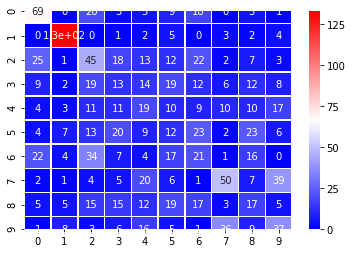

In [25]:
fit_random_forest_classifier(x_pca, y)

In [29]:
def plot_components(x, y):
    x_min, x_max = np.min(x, 0), np.max(x, 0)
    x = (x-x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))
    for i in range(x.shape[0]):
        plt.text(x[i, 0], x[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), fontdict={'size': 15})
        
    plt.xticks([])
    plt.yticks([])
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])

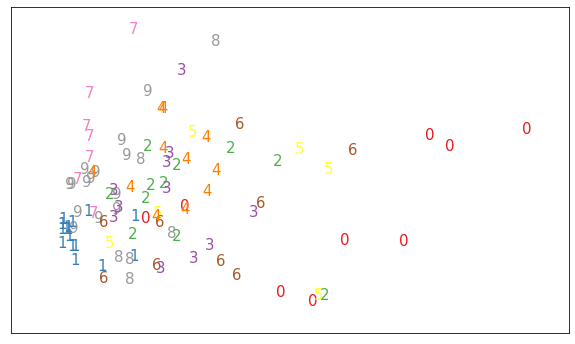

In [31]:
plot_components(x_pca[:100], y[:100])

[[ 97   0   3   0   3   6  15   0   6   0]
 [  0 143   1   0   1   2   2   0   1   0]
 [  9   2  79  23   2   2  26   0   4   1]
 [  4   3  38  34   6   5  18   1   5   0]
 [  4   0   2   0  51   8   1   7  12  19]
 [  3   0   2  14  13  37  17   5  23   5]
 [ 11   5  14   9   0   5  77   0   5   0]
 [  0   1   1   2  21   3   2  66   7  32]
 [  9   2   5  11  15  22  20   0  28   1]
 [  1   0   1   2  25   3   1  29   7  53]]
AxesSubplot(0.125,0.125;0.62x0.755)
0.5273592386994449
[[106   0   9   0   3   7   3   0   2   0]
 [  0 142   1   1   0   4   0   0   2   0]
 [  9   1 109   5   3   4  13   0   3   1]
 [  2   0  15  75   0   5   2   0  15   0]
 [  1   0   4   0  69   1   4   9   0  16]
 [  3   0   1  16  10  59   0   5  21   4]
 [  3   0  19   0   0   2 102   0   0   0]
 [  3   2   2   0  17   2   0  76   5  28]
 [  9   2   2  18   2  22   0   1  56   1]
 [  1   0   3   0  20   3   1  23   6  65]]
AxesSubplot(0.125,0.125;0.496x0.755)
0.6812053925455988
[[110   0   5   0   3   3  

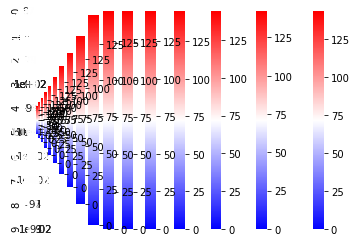

In [32]:
accs = []
for num_features in range(3, 20):
    pca, x_pca = do_pca(num_features, x)
    accs.append(fit_random_forest_classifier(x_pca, y))
    